<a href="https://colab.research.google.com/github/yellow-peach-0/DO_IT/blob/main/20230104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pingouin
!pip install scikit_posthocs

In [77]:
from matplotlib import pyplot as plt
from pandas import DataFrame
import numpy as np
import pandas as pd
import math
import sklearn.preprocessing 
from scipy import stats
import pingouin as pg
import scikit_posthocs
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [78]:
body_df = pd.read_excel("/content/drive/MyDrive/파이썬 실습/실습 데이터/body_data_2017.xlsx")

In [80]:
print(body_df.columns)

Index(['ⓞ_02_성별', 'ⓞ_06_나이_반올림', 'ⓞ_12_골격근량', 'ⓞ_13_체지방량', 'ⓞ_14_체수분',
       'ⓞ_15_단백질', 'ⓞ_16_무기질', 'ⓞ_17_BMI', 'ⓞ_18_체지방율', 'ⓞ_19_복부지방율',
       ...
       '①_124_무릎아래둘레', '①_125_장딴지둘레', '①_126_종아리최소둘레', '①_127_발목최대둘레',
       '①_128_발목너비', '①_129_발뒤꿈치너비', '①_130_위팔둘레', '①_131_팔꿈치둘레', '①_132_손목둘레',
       '①_133_머리위로뻗은주먹높이'],
      dtype='object', length=148)


#체지방률이 높으면 배둘레가 클까?
: 이건 사실, t검정이 아닌 상관관계 분석을 하는게 맞음, </br>
왜냐하면 t검정은 두집단간 동일 변수 차이를 검정하는 것이기 때문

In [81]:
fat = pd.DataFrame(body_df["ⓞ_18_체지방율"])
belly = pd.DataFrame(body_df["①_044_배둘레"])

fat.columns = ["fat"]
belly.columns = ["belly"]

In [130]:
print(len(fat))
print(len(belly))

6420
6420


In [101]:
#IQR, Outlier
fat_Q1 = fat.quantile(q=0.25)
fat_Q3 = fat.quantile(q=0.75)
fat_IQR_range = fat_Q3 - fat_Q1

belly_Q1 = belly.quantile(q=0.25)
belly_Q3 = belly.quantile(q=0.75)
belly_IQR_range = belly_Q3 - belly_Q1


fat_IQR = fat[(fat < fat_Q3 + fat_IQR_range*1.5) & (fat > fat_Q1 - fat_IQR_range*1.5)]
belly_IQR = belly[(belly < belly_Q3 + belly_IQR_range*1.5) & (belly > belly_Q1 - belly_IQR_range*1.5)]

fat = fat_IQR
belly = belly_IQR

In [ ]:
#정규화
scaler = sklearn.preprocessing.MinMaxScaler()
fat = scaler.fit_transform(fat)
fat = pd.DataFrame(fat)

belly = scaler.fit_transform(belly)
belly = pd.DataFrame(belly)

print(fat)
print(belly)

In [ ]:
#NaN?
print("before NaN delete")
print(fat.isnull().sum())
print(belly.isnull().sum())

fat[0]
belly[0]

print("\n ---------------------")
print("after NaN delete")
print(fat.isnull().sum())
print(belly.isnull().sum())

In [96]:
#t-test
print(stats.ttest_ind(fat.dropna()[0], belly.dropna()[0], equal_var=False))

Ttest_indResult(statistic=-97.34304451455982, pvalue=0.0)


Ttest_indResult(statistic=nan, pvalue=nan) </br>
: 데이터에 결측값있으면 이렇게 오류가 뜨기도한다... 



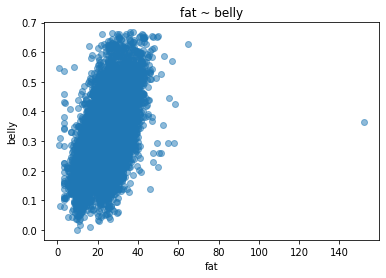

In [238]:
#산점도 시각화
plt.scatter(fat, belly, alpha=0.5)
plt.title('fat ~ belly')
plt.xlabel('fat')
plt.ylabel('belly')
plt.show()

In [222]:
#공분산
np.cov(fat, belly)[0,1]

ValueError: ignored

In [223]:
#상관계수
np.corrcoef(fat, belly)

ValueError: ignored

In [143]:
#회귀분석
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

x = fat.dropna()[0]
y = belly.dropna()[0]
x = pd.DataFrame(x[1:6000,])
y = pd.DataFrame(y[1:6000,])
print(x)
print(y)

             0
1     0.172733
2     0.047651
3     0.062210
4     0.087359
5     0.143614
...        ...
6026  0.273329
6027  0.217075
6028  0.234944
6029  0.227664
6030  0.154864

[5999 rows x 1 columns]
             0
1     0.630216
2     0.201439
3     0.181295
4     0.397122
5     0.522302
...        ...
6060  0.294964
6061  0.152518
6062  0.211511
6063  0.208633
6064  0.326619

[5999 rows x 1 columns]


In [144]:
x = np.array(x)
y = np.array(y)

In [146]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

result = lr.fit(x,y)
print(lr.coef_[0])

[0.09635929]


In [165]:
x = pd.DataFrame(x)
y = pd.DataFrame(y)

y["x"] = x
y.columns = ['y', 'x']
y

,y,x
0,0.630216,0.172733
1,0.201439,0.047651
2,0.181295,0.062210
3,0.397122,0.087359
4,0.522302,0.143614
...,...,...
5994,0.294964,0.273329
5995,0.152518,0.217075
5996,0.211511,0.234944
5997,0.208633,0.227664


In [168]:
res = ols('y ~ x', data= y).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     11.93
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           0.000556
Time:                        01:59:53   Log-Likelihood:                 4114.2
No. Observations:                5999   AIC:                            -8224.
Df Residuals:                    5997   BIC:                            -8211.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3080      0.005     66.855      0.000       0.299       0.317
x              0.0964      0.028      3.454      0.001       0.042       0.151
==============================================================================
Omnibus:                      114.764   Durbin-Watson:                   1.601
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.789
Skew:                           0.281   Prob(JB):                     1.07e-23
Kurtosis:                       2.671   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#연령대 별로 체지방률이 다를까? </br>
: 내 생각엔 나이가 많을 수록 높을 것 같다.

일단 데이터를 불러와준 뒤 나이대 별로 집합을 나눠주자

In [212]:
fat_age = pd.DataFrame(body_df[["ⓞ_06_나이_반올림","ⓞ_18_체지방율"]])
age = fat_age["ⓞ_06_나이_반올림"]
fat = fat_age["ⓞ_18_체지방율"]


fat_10 = fat_age[(age>=10)&(age<20)]
fat_20 = fat_age[(age>=20)&(age<30)]
fat_30 = fat_age[(age>=30)&(age<40)]
fat_40 = fat_age[(age>=40)&(age<50)]
fat_50 = fat_age[(age>=50)&(age<60)]
fat_60 = fat_age[(age>=60)&(age<70)]

fat_10.columns = ["age", "fat"]
fat_20.columns = ["age", "fat"]
fat_30.columns = ["age", "fat"]
fat_40.columns = ["age", "fat"]
fat_50.columns = ["age", "fat"]
fat_60.columns = ["age", "fat"]


결측값을 제거해줍시다.

In [ ]:
#NaN
fat_10 = fat_10.dropna(axis=0)
fat_20 = fat_20.dropna(axis=0)
fat_30 = fat_30.dropna(axis=0)
fat_40 = fat_40.dropna(axis=0)
fat_50 = fat_50.dropna(axis=0)
fat_60 = fat_60.dropna(axis=0)

print(fat_10.isnull().sum())
print(fat_20.isnull().sum())
print(fat_30.isnull().sum())
print(fat_40.isnull().sum())
print(fat_50.isnull().sum())
print(fat_60.isnull().sum())

연령대 별로 범주 코딩해주기

In [226]:
#연령대 coding
fat_10["연령대"] = 10
fat_20["연령대"] = 20
fat_30["연령대"] = 30
fat_40["연령대"] = 40
fat_50["연령대"] = 50
fat_60["연령대"] = 60

In [244]:
#합쳐주기
fat_age = pd.concat([fat_10, fat_20, fat_30, fat_40, fat_50, fat_60])

일단 등분산을 검정해봅시다.

In [231]:
#등분산검정
sp.stats.levene(fat_10["fat"], fat_20["fat"], fat_30["fat"], fat_40["fat"], fat_50["fat"], fat_60["fat"])

LeveneResult(statistic=34.61853183337501, pvalue=4.848505944690565e-35)

등분산검정 결과, pvalue=4.848505944690565e-35로 등분산이 아닌걸로 밝혀졌다. </br>
등분산이 아니므로 아래에선 welch 분산 분석을 하도록하자.

In [245]:
#ANOVA
pg.welch_anova(dv="fat", between="연령대", data = fat_age)

,Source,ddof1,ddof2,F,p-unc,np2
0,연령대,5,1935.016699,69.028919,1.461123e-66,0.048121


p-value: 1.461123e-66으로 다른 것으로 확인 되었다. 그렇다면 연령대가 높을 수록 체지방률도 높을까?

### 나이 먹을수록 살찌는게 사실일까?...

일단 산점도를 살펴보자.

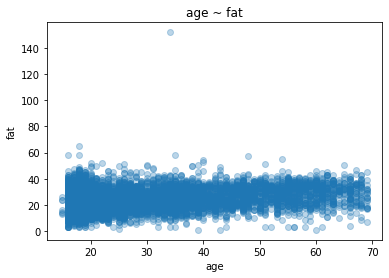

In [249]:
#scatter
plt.scatter(fat_age["age"], fat_age["fat"], alpha=0.3)
plt.title('age ~ fat')
plt.xlabel('age')
plt.ylabel('fat')
plt.show()

있어보인다,, 아주 살짝 우상향향? </br>
바로 회귀분석 해보겠음.

In [251]:
#회귀분석
x = fat_age["age"]
y = fat_age["fat"]

res = ols('y ~ x', data= fat_age).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     319.2
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.03e-69
Time:                        04:27:13   Log-Likelihood:                -22830.
No. Observations:                6402   AIC:                         4.566e+04
Df Residuals:                    6400   BIC:                         4.568e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.6546      0.257     80.439      0.000      20.151      21.158
x              0.1329      0.007     17.867      0.000       0.118       0.148
==============================================================================
Omnibus:                     1263.597   Durbin-Watson:                   1.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14201.038
Skew:                           0.615   Prob(JB):                         0.00
Kurtosis:                      10.192   Cond. No.                         82.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

회귀분석 결과 회귀계수 0.1329로 나왔다, </br>
아주 조금이지만, 나이살이 있는 듯 하다...</br>
그래프로 확인사살 해보자.

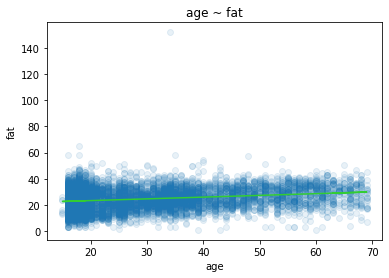

In [269]:
#liner graph
x = fat_age["age"]
y = fat_age["fat"]
plt.scatter(x, y, alpha=0.1)
plt.title('age ~ fat')
plt.xlabel('age')
plt.ylabel('fat')

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='limegreen')
plt.show()

확인사살 완료.